# Yahoo finance stock data analysis
# FinalProject Group20, Part 3.1

The purpose of this assignment is to create a 'Viz for the Public' with a 'data journalism' type presentation and interactive visualizations.


## Group Members
##### yz133@illinois.edu
##### ypeng16@illinois.edu
##### wei51@illinois.edu
##### tiannuo3@illinois.edu

In [1]:
!pip install yfinance

In [9]:
!pip install streamlit altair pandas


   ---------------------------------------- 8.6/8.6 MB 19.9 MB/s eta 0:00:00
   --------------------------------------- 731.2/731.2 kB 15.1 MB/s eta 0:00:00
   ---------------------------------------- 15.9/15.9 MB 12.2 MB/s eta 0:00:00
   ---------------------------------------- 25.3/25.3 MB 11.7 MB/s eta 0:00:00
   ---------------------------------------- 6.9/6.9 MB 11.8 MB/s eta 0:00:00
   ---------------------------------------- 1.2/1.2 MB 12.1 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 8.0.1
    Uninstalling tenacity-8.0.1:
      Successfully uninstalled tenacity-8.0.1
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.11.2
    Uninstalling Pygments-2.11.2:


ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'c:\\users\\hp\\anaconda3\\scripts\\pygmentize.exe'
Consider using the `--user` option or check the permissions.



In [11]:
!pip install --user streamlit altair pandas


  Using cached streamlit-1.40.2-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached cachetools-5.5.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl.metadata (59 kB)
  Using cached protobuf-5.29.1-cp39-cp39-win_amd64.whl.metadata (592 bytes)
  Using cached pyarrow-18.1.0-cp39-cp39-win_amd64.whl.metadata (3.4 kB)
  Using cached rich-13.9.4-py3-none-any.whl.metadata (18 kB)
  Using cached GitPython-3.1.43-py3-none-any.whl.metadata (13 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached narwhals-1.16.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached gitdb-4.0.11-py3-none-any.whl.metadata (1.2 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached pygments-2.18.0-py3-none-any.whl.metadata (2.5 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 2.0.2 which is incompatible.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 2.0.2 which is inco

In [18]:
import yfinance as yf
import pandas as pd
import bqplot as bq
from ipywidgets import VBox, HBox, Dropdown, Output, interact
from datetime import datetime

# Get Stock Data and data structure construction
end_date = datetime.now().strftime('%Y-%m-%d')
start_date = "2022-01-01"

company_names = {
    'AAPL': 'Apple',
    'MSFT': 'Microsoft',
    'GOOGL': 'Alphabet',
    'META': 'Meta Platforms',
    'TSLA': 'Tesla',
    'LLY': 'Eli Lilly',
    'NVDA': 'NVIDIA',
    'AVGO': 'Broadcom',
    'QQQ': 'Invesco QQQ'
}

tickers = list(company_names.keys())
stock_data = yf.download(tickers, start=start_date, end=end_date)

if isinstance(stock_data.columns, pd.MultiIndex):
    stock_data.columns = ['_'.join(col).strip() for col in stock_data.columns]

stock_data.reset_index(inplace=True)
stock_data.to_csv('stock_data.csv', index=False)

[*********************100%%**********************]  9 of 9 completed


## One central, interactive visualization:

This code implements two highly interactive visual dashboards for analyzing dynamic relationships in stock data. The first part provides a dashboard that allows the user to dynamically generate line charts and scatter plots by selecting the stock of interest and the data indicator (e.g. Adj Close or Volume) via drop-down menus. The line chart shows the trend of the selected indicator over time, while the scatter chart shows the correlation between the two indicators. The charts also support the mouse hover function, which makes it easy for users to view specific values and dates.

### 
The second part implements an interactive heatmap dashboard for displaying the monthly average performance of multiple stocks in different months. Users can update the heatmap in real-time by selecting different indicators (e.g. Open or High), and the color shades indicate the strength of each stock's performance on that indicator. Heatmaps visually compare performance differences and trends over time across stocks, making them ideal for exploring cyclical or significant patterns in multi-cap data. Combined with time series and correlation analysis, these two dashboards are powerful tools for financial data exploration and investment analysis.



In [3]:
# Create Interactive Dashboard
def create_dashboard(stock="AAPL", metric1="Adj Close", metric2="Volume"):
    
    dates = stock_data["Date"].to_numpy()
    metric1_data = stock_data[f"{metric1}_{stock}"].to_numpy()
    metric2_data = stock_data[f"{metric2}_{stock}"].to_numpy()

    date_scale = bq.DateScale()
    metric_scale1 = bq.LinearScale()
    metric_scale2 = bq.LinearScale()

    line_chart = bq.Lines(
        x=dates, y=metric1_data, scales={"x": date_scale, "y": metric_scale1},
        labels=[metric1], colors=["blue"], display_legend=True
    )
    x_axis = bq.Axis(scale=date_scale, label="Date")
    y_axis = bq.Axis(scale=metric_scale1, orientation="vertical", label=f"{metric1} ({stock})")

    scatter_plot = bq.Scatter(
        x=metric1_data, y=metric2_data, scales={"x": metric_scale1, "y": metric_scale2},
        colors=["orange"], default_size=50
    )
    scatter_x_axis = bq.Axis(scale=metric_scale1, label=f"{metric1} ({stock})")
    scatter_y_axis = bq.Axis(scale=metric_scale2, orientation="vertical", label=f"{metric2} ({stock})")

    line_fig = bq.Figure(marks=[line_chart], axes=[x_axis, y_axis], title=f"{metric1} Over Time for {stock}")
    scatter_fig = bq.Figure(marks=[scatter_plot], axes=[scatter_x_axis, scatter_y_axis], title=f"{metric1} vs {metric2} for {stock}")

    return VBox([line_fig, scatter_fig])

# Dropdown
available_stocks = list(company_names.keys())
metrics = ["Open", "High", "aLow", "Close", "Adj Close", "Volume"]
stock_dropdown = Dropdown(options=available_stocks, description="Stock")
metric1_dropdown = Dropdown(options=metrics, description="Metric 1")
metric2_dropdown = Dropdown(options=metrics, description="Metric 2")

# Output widget
output = Output()

def update_dashboard(stock, metric1, metric2):
    output.clear_output()
    with output:
        dashboard = create_dashboard(stock, metric1, metric2)
        display(dashboard)

# Link widgets
interact(update_dashboard, stock=stock_dropdown, metric1=metric1_dropdown, metric2=metric2_dropdown)
# Display
VBox([HBox([]), output])

interactive(children=(Dropdown(description='Stock', options=('AAPL', 'MSFT', 'GOOGL', 'META', 'TSLA', 'LLY', '…

In [4]:
import ipywidgets as widgets

# Create Interactive Dashboard
def create_dashboard(stock="AAPL", metric1="Adj Close", metric2="Volume"):
    
    dates = stock_data["Date"].to_numpy()
    metric1_data = stock_data[f"{metric1}_{stock}"].to_numpy()
    metric2_data = stock_data[f"{metric2}_{stock}"].to_numpy()

    date_scale = bq.DateScale()
    metric_scale1 = bq.LinearScale()
    metric_scale2 = bq.LinearScale()

    line_chart = bq.Lines(
        x=dates, y=metric1_data, scales={"x": date_scale, "y": metric_scale1},
        labels=[metric1], colors=["blue"], display_legend=True
    )
    x_axis = bq.Axis(scale=date_scale, label="Date")
    y_axis = bq.Axis(scale=metric_scale1, orientation="vertical", label=f"{metric1} ({stock})")

    scatter_plot = bq.Scatter(
        x=metric1_data, y=metric2_data, scales={"x": metric_scale1, "y": metric_scale2},
        colors=["orange"], default_size=50
    )
    scatter_x_axis = bq.Axis(scale=metric_scale1, label=f"{metric1} ({stock})")
    scatter_y_axis = bq.Axis(scale=metric_scale2, orientation="vertical", label=f"{metric2} ({stock})")

    line_fig = bq.Figure(marks=[line_chart], axes=[x_axis, y_axis], title=f"{metric1} Over Time for {stock}")
    scatter_fig = bq.Figure(marks=[scatter_plot], axes=[scatter_x_axis, scatter_y_axis], title=f"{metric1} vs {metric2} for {stock}")

    return VBox([line_fig, scatter_fig])

    # Aggregate data (monthly mean)
stock_data['Month'] = stock_data['Date'].dt.to_period('M')
monthly_data = stock_data.groupby('Month').mean()

# Heatmaps
metrics = ["Adj Close", "Volume", "Open", "High", "Low"]
heatmaps = []
metric_labels = []

for metric in metrics:
    heatmap_data = monthly_data.filter(like=metric).to_numpy().T
    stocks = [col.split('_')[-1] for col in monthly_data.filter(like=metric).columns]
    months = monthly_data.index.astype(str)

    col_scale = bq.ColorScale(scheme='Blues')
    x_scale = bq.OrdinalScale()
    y_scale = bq.OrdinalScale()

    heatmap = bq.GridHeatMap(
        color=heatmap_data,
        row=stocks,
        column=months,
        scales={'color': col_scale, 'row': y_scale, 'column': x_scale},
        interactions={'click': 'select'},
        anchor_style={'fill': 'blue'},
        selected_style={'fill': 'red'},
        unselected_style={'opacity': 0.8}
    )

    x_axis = bq.Axis(scale=x_scale, label="Month", side="bottom", orientation="horizontal")
    y_axis = bq.Axis(scale=y_scale, label="Stock", orientation="vertical", side="left")
    color_axis = bq.ColorAxis(scale=col_scale, orientation='horizontal', side='top')

    fig = bq.Figure(marks=[heatmap], axes=[x_axis, y_axis, color_axis], title=f"Monthly Average {metric}")
    heatmaps.append(fig)
    metric_labels.append(widgets.Label(value=f"Selected {metric}: None"))

# Dashboard
dashboard_elements = [widgets.VBox([label, heatmap]) for label, heatmap in zip(metric_labels, heatmaps)]
dashboard = widgets.VBox(dashboard_elements)
dashboard

# Contextual visualizations 1
This is an interactive visualization tool for stock trading data analysis, designed to examine the correlation between different stocks or indices based on specific metrics such as opening price, closing price, or trading volume. By selecting a metric from the dropdown menu, the tool dynamically generates a correlation heatmap, illustrating the degree of association between the chosen stocks for that metric. The current chart focuses on trading volume (Volume), showing the correlation relationships among stocks and indices like AAPL, GOOGL, MSFT, and QQQ.  


##### Strongest Positive Correlations:  
GOOGL and MSFT (0.65): Google (Alphabet) and Microsoft show a high correlation in trading volumes, likely due to shared market segments and similar reactions to macroeconomic factors.  
QQQ and MSFT (0.68): The QQQ ETF (tracking the Nasdaq 100 index) aligns closely with Microsoft's volume, as MSFT is a significant component of the index.  
AAPL and QQQ (0.59): Apple's trading volume correlates with QQQ, reflecting its influence as a major index constituent.  
##### Weak or Negative Correlations:  
TSLA exhibits weak to negative correlations with most stocks, including AAPL (-0.06) and NVDA (-0.01). This suggests Tesla's trading volume may respond to unique factors, such as EV market dynamics, compared to the broader tech industry.

##### 
Portfolio Diversification: Observing low or negative correlations, like TSLA with others, helps in building diversified portfolios to mitigate risk.  
High correlations within stocks like MSFT, GOOGL, and QQQ highlight sector trends, indicating that events affecting one are likely to impact the others similarly.



##### The contextual visualization presented here was fully created by me. The code used to generate the visualization has been uploaded to my GitHub repository and can be accessed at the following link: https://github.com/WJHWJH1208/IS_445_FINAL. 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import VBox, HBox, Dropdown, Output
from IPython.display import display


metrics = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
output = Output()

def create_correlation_heatmap(metric):
    output.clear_output()
    
    # Filter all columns of the selected metric
    cols = [col for col in stock_data.columns if col.startswith(metric + "_")]
    
    if not cols:
        with output:
            print(f"No data available for the selected metric: {metric}")
        return
    

    corr = stock_data[cols].corr()

    # Heat mapping
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)

    # Set labels for x- and y-axis
    tickers = [col.replace(metric + "_", "") for col in cols]
    ax.set_xticks(np.arange(len(tickers)))
    ax.set_yticks(np.arange(len(tickers)))
    ax.set_xticklabels(tickers, rotation=45, ha="right")
    ax.set_yticklabels(tickers)

    # Add a color bar
    for i in range(len(tickers)):
        for j in range(len(tickers)):
            value = corr.iloc[i, j]
            text_color = "white" if abs(value) > 0.5 else "black"
            ax.text(j, i, f"{value:.2f}", ha="center", va="center", color=text_color)

    # 添加颜色条
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label("Correlation Coefficient")

    ax.set_title(f"Correlation Heatmap ({metric})")
    plt.tight_layout()

    with output:
        plt.show()

# Drop-down menus
metric_dropdown = Dropdown(
    options=metrics,
    value="Volume",
    description="Metric",
)

# Binding interactions
def update_heatmap(metric):
    create_correlation_heatmap(metric)

metric_dropdown.observe(lambda change: update_heatmap(change.new), names='value')


create_correlation_heatmap(metric_dropdown.value)
dashboard = VBox([metric_dropdown, output])
display(dashboard)


# Contextual visualizations 2

#### Time Series Decomposition
The decomposition chart breaks Microsoft's closing price into **trend**, **seasonality**, and **residual** components. The **trend** shows a steady increase in stock value over time, especially accelerating after 2015, reflecting Microsoft's growing dominance in cloud computing, software, and other key sectors. The **seasonal** component reveals consistent yearly patterns, likely driven by fiscal reporting cycles or macroeconomic influences, while the relatively stable **residuals** indicate minimal irregularities outside the identified patterns.

#### Candlestick Chart
The candlestick chart presents a detailed history of Microsoft's daily stock price movement, including open, high, low, and close (OHLC) prices, along with trading volumes. The chart highlights significant volatility during Microsoft's early growth stages, reflecting investor speculation and market dynamics. Post-2015, both price and trading volume surged, indicating heightened investor interest as Microsoft solidified its market leadership, particularly in cloud services and enterprise software.

#### Anomaly Detection
Anomaly detection pinpoints outlier points in the historical price data. Early anomalies are linked to sharp price fluctuations during Microsoft's rapid growth phases or broader market corrections. Recent anomalies, especially post-2020, coincide with the tech industry's boom during the COVID-19 pandemic, driven by accelerated adoption of digital services and remote work technologies.

#### Stock Splits Impact
The stock split visualization overlays Microsoft's closing prices with its historical stock split events. Frequent splits before 2003 reflect Microsoft's strategy to maintain a lower stock price, enhancing accessibility for retail investors. The absence of splits in recent years, despite significant price growth, suggests a strategic shift to target institutional investors and align with the broader trend of higher-priced tech stocks.



#### This section of the analysis references insights and methodologies from the Kaggle notebook titled "Microsoft Stock Data Analysis & Visualization" by tdarthub, available at Kaggle
https://www.kaggle.com/code/tdarthub/microsoft-stock-data-analysis-visualization

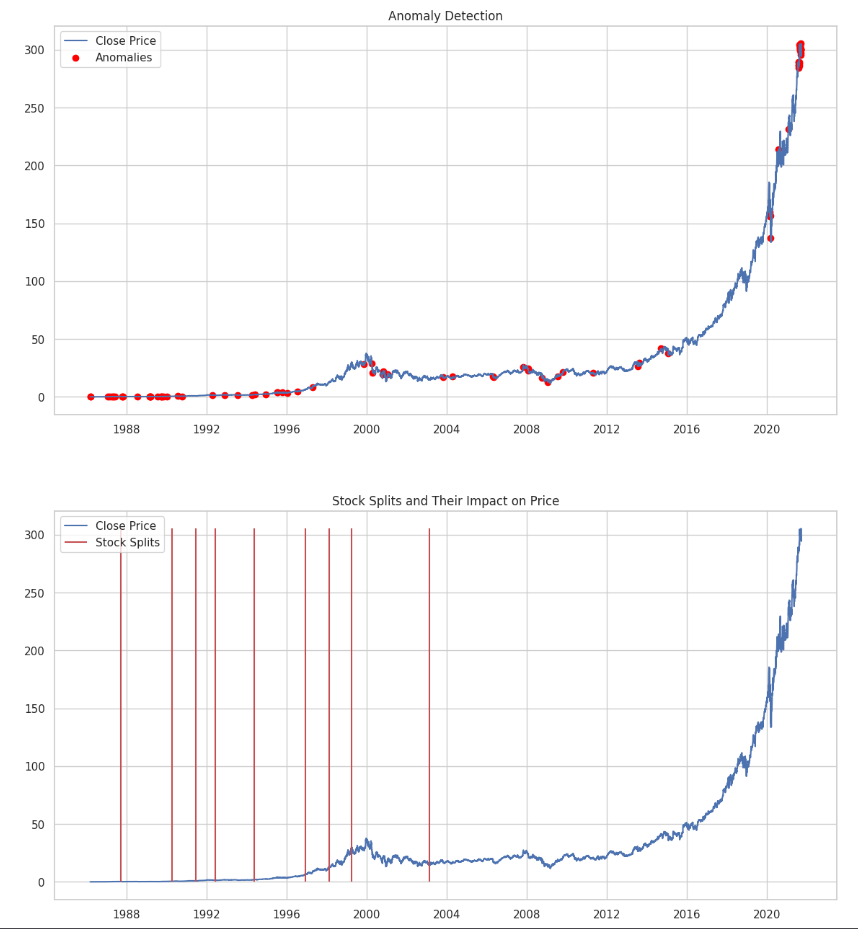

In [6]:
from IPython.display import Image, display


image_path = "chart1.png"  
display(Image(image_path))


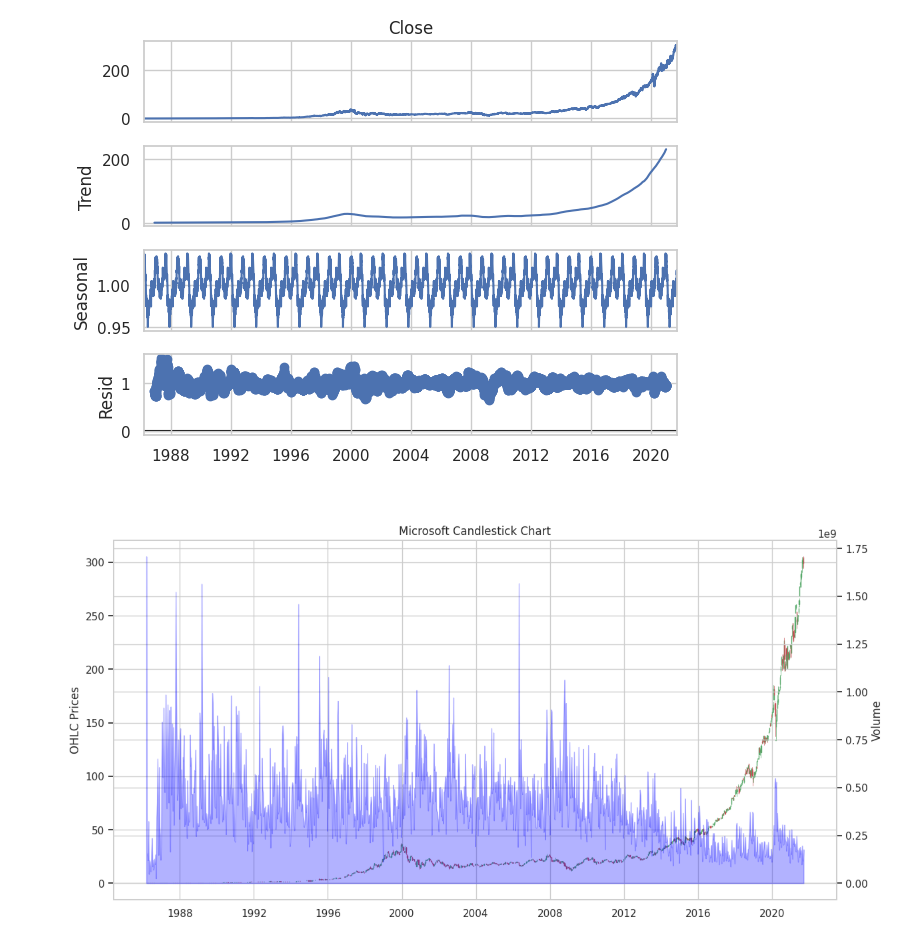

In [7]:

image_path = "chart2.png"  
display(Image(image_path))
